In [1]:
# K-Means Clustering

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the dataset
df = pd.read_csv('bank.csv')

In [24]:
df

,id,age,sex,region,income,married,children,car,mortgage,delays
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,NO,YES
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,NO,YES
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,YES


In [25]:
# Choosing dataset
X = df.iloc[:, [1, 4]].values

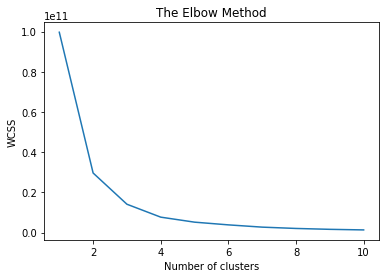

In [30]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
kms.cluster_centers_

array([[6.08157895e+01, 5.19730263e+04],
       [4.27536232e+01, 2.51076729e+04],
       [5.06451613e+01, 3.71793032e+04],
       [2.94559585e+01, 1.42846986e+04]])

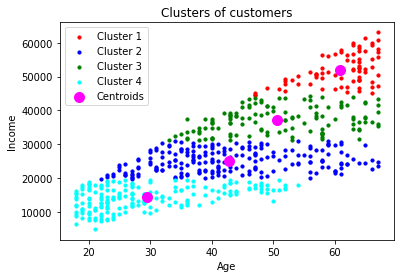

In [29]:
# Visualising the clusters
plt.scatter(X[km == 0, 0], X[km == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[km == 1, 0], X[km == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[km == 2, 0], X[km == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[km == 3, 0], X[km == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], s = 100, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()